In [11]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots

plt.style.use('ieee')

import utils

In [12]:
dfs = []
for path in sorted(Path("../out/230206/cfs/").glob("*")):
    if ".DS_Store" in str(path):
        continue
    df = pd.read_csv(path, delimiter=";", header=None, engine="python")
    dfs.append(df)

In [13]:
df = pd.concat(dfs).reset_index()
df.columns = [
    "cf_idx",
    "name",
    "method",
    "gci_weight",
    "n_clusters",
    "n_buses",
    "n_lines",
    "initial_load",
    "initial_line",
    "lost_load",
    "n_iterations",
    "n_line_failures",
    "n_gen_adjustments",
    "n_alive_buses",
    "n_final_components",
]

# Keep only subset of columns
df = df[
    [
        "cf_idx",
        "name",
        "method",
        "n_clusters",
        "n_buses",
        "n_lines",
        "initial_load",
        "lost_load",
        "n_line_failures",
    ]
]

# df = df[df['gci_weight'].isin([' no_gci', ' neg_weight'])]
names = {
    "original": "OG",
    "warm_start_maximum_congestion": "MCWS",
    "single_stage_power_flow_disruption": "PFD",
    "two_stage_maximum_congestion": "MC2ST",
}
df["method"] = df["method"].apply(lambda s: s.strip())
df["method"] = df["method"].map(names)

# Filter cases to the ones with enough lost load in original network and complete results
df["name"] = df["name"].apply(utils.format_case_name)
df = df[
    df["name"].isin(
        [
            "EPRI-39",
            "IEEE-57",
            # "IEEE-162",
            "GOC-179",
            "IEEE-300",
            "GOC-500",
            "SDET-588",
            "GOC-793",
        ]
    )
]

In [14]:
pd.set_option("display.max_rows", 1000)

data = df.groupby(["name", "method", "n_clusters"]).mean()
data.sort_values(by="n_buses")

cf_idx  n_buses  n_lines  initial_load  \
name     method n_clusters                                           
EPRI-39  MC2ST  2             21.5     39.0     44.0   6254.230000   
         PFD    3             21.5     39.0     44.0   6254.230000   
                2             21.5     39.0     44.0   6254.230000   
         OG     1             22.5     39.0     46.0   6254.230000   
         MCWS   4             20.5     39.0     42.0   6254.230000   
         PFD    4             21.5     39.0     44.0   6254.230000   
         MCWS   2             21.0     39.0     43.0   6254.230000   
         MC2ST  4             21.0     39.0     43.0   6254.230000   
                3             21.5     39.0     44.0   6254.230000   
         MCWS   3             20.5     39.0     42.0   6254.230000   
IEEE-57  PFD    4             34.0     57.0     69.0   1250.800000   
         MCWS   4             31.5     57.0     64.0   1250.800000   
                3             34.0     57.0     69.0   1250.800000   
                2             34.0     57.0     69.0   1250.800000   
         MC2ST  4             34.5     57.0     70.0   1250.800000   
                3             37.5     57.0     76.0   1250.800000   
                2             37.5     57.0     76.0   1250.800000   
         PFD    3             37.5     57.0     76.0   1250.800000   
         OG     1             39.5     57.0     80.0   1250.800000   
         PFD    2             37.5     57.0     76.0   1250.800000   
GOC-179  OG     1            131.0    179.0    263.0  33940.500000   
         MC2ST  2            129.0    179.0    259.0  33940.500000   
                3            126.5    179.0    254.0  33940.500000   
                4            125.5    179.0    252.0  33940.500000   
         MCWS   2            128.0    179.0    257.0  33940.500000   
                3            123.0    179.0    247.0  33940.500000   
                4            122.0    179.0    245.0  33940.500000   
         PFD    2            129.0    179.0    259.0  33940.500000   
                3            126.5    179.0    254.0  33940.500000   
                4            125.5    179.0    252.0  33940.500000   
IEEE-300 MC2ST  3            197.0    300.0    395.0  23848.950000   
                4            192.0    300.0    385.0  23848.950000   
         MCWS   2            199.5    300.0    400.0  23848.950000   
         PFD    3            197.0    300.0    395.0  23848.950000   
         MCWS   4            192.0    300.0    385.0  23848.950000   
         OG     1            205.0    300.0    411.0  23848.950000   
         PFD    2            199.5    300.0    400.0  23848.950000   
                4            192.0    300.0    385.0  23848.950000   
         MCWS   3            197.0    300.0    395.0  23848.950000   
         MC2ST  2            199.5    300.0    400.0  23848.950000   
GOC-500  MC2ST  2            355.5    500.0    712.0  17772.920734   
         PFD    4            349.0    500.0    699.0  17772.920734   
                2            355.5    500.0    712.0  17772.920734   
         OG     1            364.0    500.0    729.0  17772.920734   
         MCWS   4            349.0    500.0    699.0  17772.920734   
                3            352.5    500.0    706.0  17772.920734   
                2            355.5    500.0    712.0  17772.920734   
         MC2ST  4            349.5    500.0    700.0  17772.920734   
                3            353.0    500.0    707.0  17772.920734   
         PFD    3            352.5    500.0    706.0  17772.920734   
SDET-588 MC2ST  3            329.0    588.0    659.0  10765.660000   
                4            327.5    588.0    656.0  10765.660000   
         MCWS   2            334.5    588.0    670.0  10765.660000   
                4            324.0    588.0    649.0  10765.660000   
         OG     1            342.5    588.0    686.0  10765.660000   
         PFD    2            336.0    

In [15]:
def calculate_relative_values(df, numerator, denominator):
    initial_values = df[denominator].fillna(method="pad")
    relative_values = np.round((df[numerator] / initial_values.values) * 100, 2)
    return relative_values

# Unstack data
df = data.unstack(level=1)

# Select relevant columns
columns = [    ("n_lines", "MC2ST"),    ("n_lines", "MCWS"),    ("n_lines", "OG"),    ("n_lines", "PFD"),    ("initial_load", "MC2ST"),    ("initial_load", "MCWS"),    ("initial_load", "OG"),    ("initial_load", "PFD"),    ("lost_load", "MC2ST"),    ("lost_load", "MCWS"),    ("lost_load", "OG"),    ("lost_load", "PFD"),    ("n_line_failures", "MC2ST"),    ("n_line_failures", "MCWS"),    ("n_line_failures", "OG"),    ("n_line_failures", "PFD")]
df = df[columns]

# Calculate lost load
lost_load_cols = [("lost_load", "MCWS"), ("lost_load", "MC2ST"), ("lost_load", "PFD"), ("lost_load", "OG")]
df["lost_load_MC"] = np.fmin(df[lost_load_cols[0]], df[lost_load_cols[1]])
df["lost_load_PFD"] = df[lost_load_cols[2]]
df["lost_load_OG"] = df[lost_load_cols[3]]
df["relative_lost_load_MC"] = calculate_relative_values(df, "lost_load_MC", ("initial_load", "OG"))
df["relative_lost_load_PFD"] = calculate_relative_values(df, "lost_load_PFD", ("initial_load", "OG"))
df["relative_lost_load_OG"] = calculate_relative_values(df, "lost_load_OG", ("initial_load", "OG"))

# Calculate % line failures
n_lines_cols = [("n_lines", "MC2ST"), ("n_lines", "MCWS"), ("n_lines", "PFD"), ("n_lines", "OG")]
df["n_lines_MC"] = np.fmin(df[lost_load_cols[0]], df[lost_load_cols[1]])
df["n_lines_PFD"] = df[n_lines_cols[2]]
df["n_lines_OG"] = df[n_lines_cols[3]]
df["relative_n_lines_MC"] = calculate_relative_values(df, "n_lines_MC", ("n_lines", "OG"))
df["relative_n_lines_PFD"] = calculate_relative_values(df, "n_lines_PFD", ("n_lines", "OG"))
df["relative_n_lines_OG"] = calculate_relative_values(df, "n_lines_OG", ("n_lines", "OG"))

# Remove intermediate columns
# df = df.drop(columns=lost_load_cols + n_lines_cols)

In [16]:
og_lost_load = df['lost_load_OG'].dropna().reset_index()[['name', 'lost_load_OG']]

mc_lost_load = np.fmin(df[lost_load_cols[0]], df[lost_load_cols[1]]).dropna()
mc_lost_load = mc_lost_load.groupby('name').mean()

pfd_lost_load = df[[lost_load_cols[2]]].dropna().reset_index(level=[0,1])
pfd_lost_load.columns = ['name', 'n_clusters', 'lost_load']
pfd_lost_load = pfd_lost_load.groupby('name')['lost_load'].mean()

In [17]:
lost_load = og_lost_load.copy()
lost_load['lost_load_mc'] = mc_lost_load.values
lost_load['lost_load_pfd'] = pfd_lost_load.values
lost_load['initial_load'] = data.groupby('name')['initial_load'].max().values

In [18]:
rel_lost_load = lost_load[['lost_load_OG', 'lost_load_mc', 'lost_load_pfd']].values / lost_load[['initial_load']].values
res = pd.DataFrame(rel_lost_load, columns=['Original', 'TP-PFD', 'TP-NC']) * 100
res.index = lost_load.name

# Sort by network size
res['index_as_column'] = res.index
res['key_func_value'] = res['index_as_column'].apply(lambda s: int(s.split('-')[-1])) # network size
res.sort_values('key_func_value', inplace=True)
del res['key_func_value']
del res['index_as_column']

In [19]:
res

,Original,TP-PFD,TP-NC
name,,,
EPRI-39,21.280118,13.977071,11.054036
IEEE-57,6.287676,5.825274,16.711030
GOC-179,3.892777,3.840961,1.909264
IEEE-300,34.759798,9.766541,9.769256
GOC-500,6.275747,6.653406,6.881252
SDET-588,26.626439,15.454355,15.627057
GOC-793,48.590094,44.754760,49.597229


In [21]:
res.mean()

Original    21.101807
TP-PFD      14.324624
TP-NC       15.935589
dtype: float64

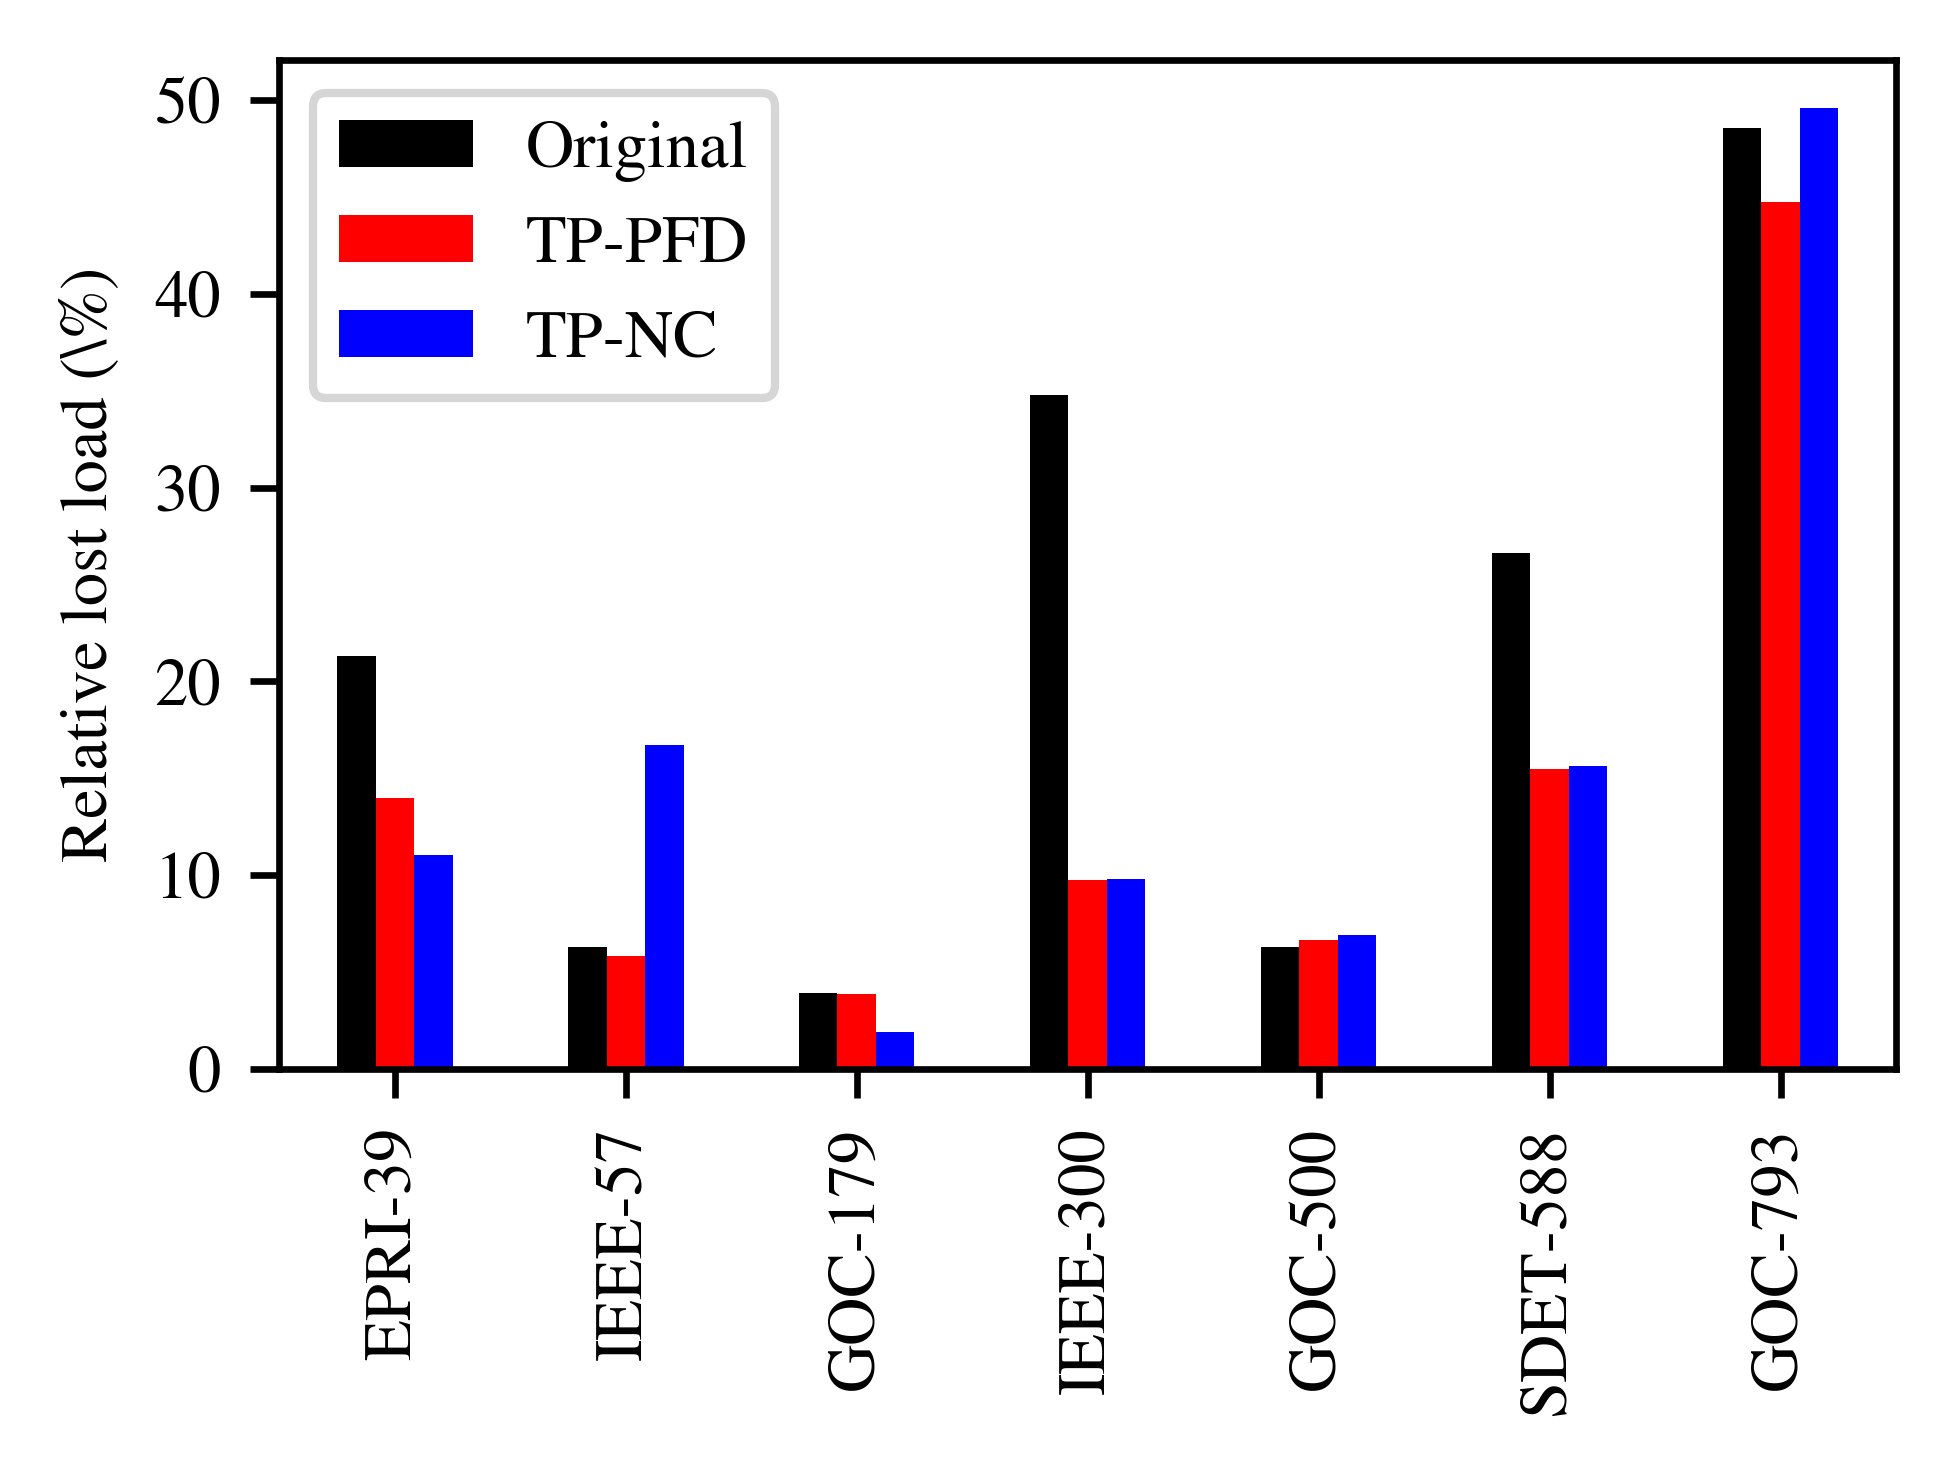

In [20]:
fig, ax = plt.subplots()

res.plot(kind='bar', ax=ax)

# plt.title('Lost load relative to network load')
plt.xlabel('')
plt.ylabel('Relative lost load (\%)')
plt.tight_layout()

plt.savefig('../figures/relative-lost-load.pdf')